In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from cvxopt import matrix, solvers ##quadratic programming problem solver 

## Generate and visualize the data

/tmp/ipykernel_92160/1602186355.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


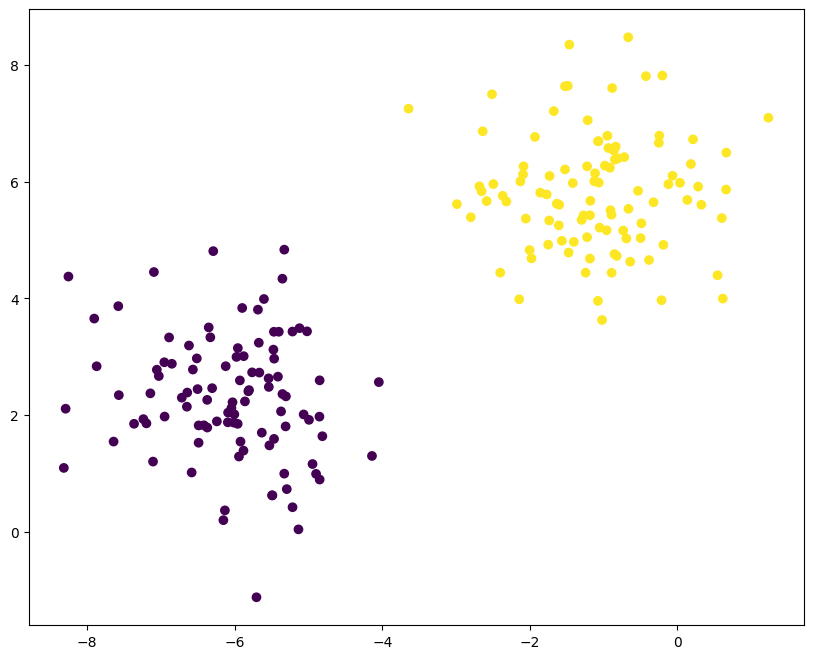

In [2]:
N=200 # number of samples
D=2 # number of dimensions
C=2 # number of classes
seed = 1234

alpha_tol = 1e-4

X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed)
y[y==0] = -1 # it is more convenient to have -1 and 1 as class labels for the support vector machine (hard-margin, softmargin=perceptron)
y = y.astype(np.float)
plt.figure(figsize=[10, 8])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Task1: Solving the SVM dual problem

Remember, that the SVM dual problem can be formulated as a Quadratic programming prolem by using (Lagragian) dual function.
Original function is the constrained problem such that,
### The size of margine
$$
\frac{2}{\mathbf{||W||}}
$$

$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T\mathbf{W}
==
\text{maximize}_{\mathbf{x}}\quad
    \frac{2}{\mathbf{||W||}}
$$

### Primary optimization problem
    Hard margine support vector machine
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T \mathbf{W}
\\
\text{subject to}\quad \xi_i\geq 0 \\
        y_i(\mathbf{W}\mathbf{x_i}+b)-1 \\
        i={0, 1, ,,, , N}
$$

    Lagrange (unconstrained optimization problem)
$$
L(\mathbf{W}, \mathbf{b}, \mathbf{\alpha})= \frac{1}{2}\mathbf{W}^T \mathbf{W} + \sum_{i=1}^{N}\alpha_i [y_i(\mathbf{W}\mathbf{x_i}+b)-1]
\\
\alpha_i \geq 0
$$

    Lagrangian dual function
$$
g(\mathbf{\alpha}) = \text{minimize}_{\mathbf{W, b}} L(\mathbf{W}, \mathbf{b}, \mathbf{\alpha}) \quad
= L(\mathbf{W^*}, \mathbf{b^*}, \mathbf{\alpha})
$$

    Lagrangian dual problem = QP (there is efficient solver)
$$
\text{maximize}_{\mathbf{\alpha}}\quad g(\alpha)
\\
\text{subject to}\quad
W = \sum_{i=1}^{N} y_i x_i \alpha_i
\\
\sum_{i=1}^{N} y_i\alpha_i= 0
\\
\alpha_i \geq 0
$$

    Target QP
$$
\mathbf{Q}=-\mathbf{y}\mathbf{y}^T+\mathbf{X}^T\mathbf{X}
\\
\text{maximize}_{\mathbf{\alpha}}\quad
    \frac{1}{2}\mathbf{\alpha}^TQ\mathbf{\alpha}+1_N^T\alpha
\\
\text{subject to}\quad
    \sum_{i=1}^{N} y_i\alpha_i= 0
\\
    \alpha_i \geq 0
$$

- Only support vectors $$\alpha_i != 0$$contribute to define the binary classifier

### Primary optimization problem
    Soft margine support vector machine
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T \mathbf{W} + C\sum_{i=1}^{N}[y_i(\mathbf{W}\mathbf{x_i}+b)-1+\xi_i]
\\
\text{subject to}\quad \xi_i\geq 0 \\
        y_i(\mathbf{W}\mathbf{x_i}+b)-1+\xi_i \geq 0
        \\
        i={0, 1, ,,, , N}

$$

### Hinge Loss
$$
\text{Hinge(z)} = \text{max}(0, 1-z) 
$$

    Unconstrained optimization problem (soft margine)
    Hinge Loss Minimization problem

    Optimum
$$
\xi_i \geq 1-[y_i(\mathbf{W}\mathbf{x_i}+b)] 
\\
\mathbf{Z} = y_i(\mathbf{W}\mathbf{x_i}+b)
\\
\xi_i \geq 1-\mathbf{Z}
\\
$$
    unconstrained soft-margin optimization problem
    Hinge Loss minimization -> Stochastic gradient descent
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T\mathbf{W} + Hinge(\mathbf{Z})
    \\
\text{where}\quad
\mathbf{Z} = y_i(\mathbf{W}\mathbf{x_i}+b)

$$


### QP: Quadratic programming 
There is a certain solver that can solve this type of problem efficiently.
There is the 'CVXOPT' library

We use the following form of a QP problem 
    
    MINIMIZATION not maximization
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{x}^T \mathbf{P} \mathbf{x} + \mathbf{q}^T \mathbf{x} \\
\text{subject to}\quad
    \mathbf{G}\mathbf{x} \le \mathbf{h}\text{ and }
    \mathbf{A}\mathbf{x} = \mathbf{b}\, .
$$

$$
\mathbf{x} = \mathbf{\alpha}
\\
\mathbf{P}=\mathbf{y}\mathbf{y}^T\odot\mathbf{X}\mathbf{X}^T
\\
\mathbf{G}=-1_N
\\
\mathbf{A}=\mathbf{y}^T
\\
\mathbf{q}=-1_N
\\
\mathbf{h}=0_N
\\
\mathbf{b}=0
$$

$$
\text{minimize}_{\mathbf{\alpha}}\quad
    \frac{1}{2}\mathbf{\alpha}^T \mathbf{P} \mathbf{\alpha} + \mathbf{1_N}^T \mathbf{\alpha} \\
\text{subject to}\quad
    \mathbf{-1_N}\mathbf{\alpha} \le \mathbf{0_N}\text{ and }
    \mathbf{y}^T\mathbf{\alpha} = \mathbf{0}\, .
\\
\text{where}\quad
    \mathbf{P}=-\mathbf{y}\mathbf{y}^T*\mathbf{X}^T\mathbf{X}

$$

In [3]:
def solve_dual_svm(X, y):
    """
    Solve "Langragian dual problem" the dual formulation of the SVM problem


    Args:
        X : array, shape [N, D]
            Input features
        y : array, shape [N]
            Binary class labels (in {-1, 1} format).

    Returns
        alphas : lagrange multiplier for respective sample i
            Solution of the dual problem
    """

    # TO use the QP solver, the type of paramters should be cvxopt.matrix

    N, D= X.shape
    """ Matrix operator
    *, np.dot, @ = inner product
    """

    _P = np.multiply((y[:, None] @ y[None, :]), (X @ X.transpose())) 
    _q = -1 * np.ones([N, 1])
    _G = -1 * np.eye(N) # diagonal matrix
    _h = np.zeros(N)
    _A = y.reshape(1,-1)
    
    P = matrix(_P)
    q = matrix(_q)
    G = matrix(_G)
    h = matrix(_h) 
    A = matrix(_A)
    b = matrix(np.zeros(1))

    solvers.options['show_progress']=False
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])
    return alphas.reshape(-1)

### Recovering the perpendicular vector of the classifier and bias
    Weights = perpendicular vector
$$
W = \sum_{i=1}^{N} y_i x_i \alpha_i
$$

    Bias
Fot complementary slackness condition(strong duality),
we need to funfill the requirement, such that
$$
L(\mathbf{W^*}, \mathbf{b^*}, \alpha^*) = f_0(\mathbf{W^*}, \mathbf{b^*}) 
$$
$$
\sum_{i=1}^{N}\alpha_i^* [y_i(\mathbf{W^*}\mathbf{x_i}+b)-1] = 0
$$
Hence
$$
\text{where}\quad \alpha_i !=0
\\
y_i(\mathbf{W^*}\mathbf{x_i}+b)-1 = 0
\\
b =  y_i - \mathbf{W^*}\mathbf{x_i}
$$


In [4]:
def compute_weights_and_bias(alpha, X, y):
    """
    Args:
        alpha : array, shape[N]
            Solution of QP, the output of the solver
        X : array, shape[N, D]
            Input features.
        y : array, shape[N]
            Binary class labels (in {-1, 1} format).
    Returns:
        W : array, shape[D]
            Perpendicular vector of the classifier
        b : float
            Bias of the classifier
    """
    w  = np.einsum("i,i,ij->j", alpha, y, X)
    ## also possible: w = np.dot(X.T, alpha*y)
    support_vect = (alpha > alpha_tol)
    
    biases = y[support_vect] - np.dot(X[support_vect, :], w)
    # b = np.mean(biases)

    # Numerically statble 
    b = np.sum(alpha[support_vect]*biases) / np.sum(alpha[support_vect])
    return w, b

In [5]:
def plot_data_with_hyperplane_and_support_vectors(X, y, alpha, w, b):
    """Plot the data as a scatter plot together with the separating hyperplane.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Input features.
    y : array, shape [N]
        Binary class labels (in {-1, 1} format).
    alpha : array, shape [N]
        Solution of the dual problem.
    w : array, shape [D]
        Weight vector.
    b : float
        Bias term.
    """
    plt.figure(figsize=[10, 8])
    # Plot the hyperplane
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.linspace(X[:, 0].min(), X[:, 0].max())
    plt.plot(x, x * slope + intercept, 'k-', label='decision boundary')
    plt.plot(x, x * slope + intercept - 1/w[1], 'k--')
    plt.plot(x, x * slope + intercept + 1/w[1], 'k--')
    # Plot all the datapoints
    plt.scatter(X[:, 0], X[:, 1], c=y)
    # Mark the support vectors
    support_vecs = alpha > alpha_tol
    plt.scatter(X[support_vecs, 0], X[support_vecs, 1], c=y[support_vecs], s=250, marker='*', label='support vectors')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(loc='upper left')

In [6]:
alpha = solve_dual_svm(X, y)
print(alpha)
w, b = compute_weights_and_bias(alpha, X, y)
print("w =", w)
print("b =", b)
print("support vectors:", np.arange(len(alpha))[alpha > alpha_tol])

[3.93025192e-10 4.08362586e-10 2.58659277e-09 6.34201913e-10
 1.22177769e-09 6.10164590e-10 6.80668606e-10 4.27744471e-10
 4.64884594e-10 3.97070913e-10 4.45316138e-10 5.30926634e-10
 5.01901154e-10 5.85627374e-10 4.71664314e-10 4.92456797e-10
 6.61337588e-10 2.94726610e-09 1.05147458e-09 4.40692729e-10
 4.03132563e-10 7.92744191e-10 5.81928532e-10 6.65531094e-10
 5.61127996e-10 7.18900560e-10 8.35560780e-10 2.51021530e-08
 9.32920115e-10 4.96114843e-10 5.09514242e-10 5.57273001e-10
 7.03766707e-10 8.37350834e-10 7.26742431e-08 1.78206019e-09
 5.06686134e-10 1.02437311e-09 4.21063117e-10 8.30267616e-10
 5.93588579e-10 6.10531697e-10 1.65878310e-09 4.35779494e-10
 7.12102437e-10 4.79614578e-10 7.47674017e-10 6.25038985e-10
 7.24676283e-10 6.37298626e-10 5.70553867e-10 4.78245050e-10
 5.06374553e-10 5.96326384e-10 6.08877197e-10 7.61174973e-10
 6.87035475e-10 9.35534636e-10 4.07552762e-10 3.47841691e-10
 1.04021661e-09 3.94633169e-10 9.53281295e-10 3.01867621e-09
 8.99550966e-10 4.157816

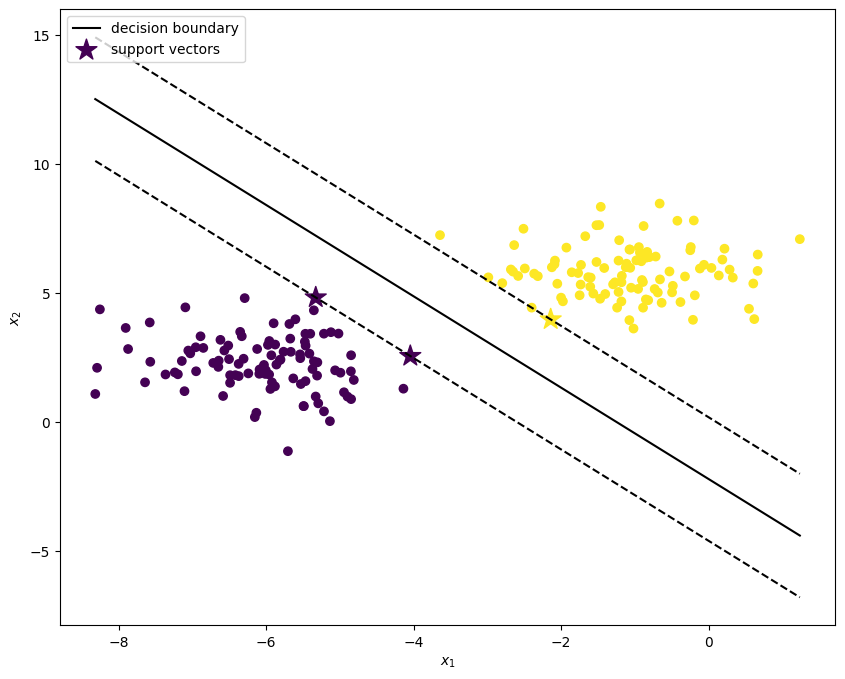

In [7]:
plot_data_with_hyperplane_and_support_vectors(X, y, alpha, w, b)
plt.show()